In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import json
from matplotlib import rcParams
%load_ext autoreload
%autoreload 2

rcParams.update({
  "text.usetex": True,
  "font.family": "Computer Modern Roman",
  "font.size":    16.0
})


In [2]:
data = pd.read_csv("data/PSCompPars_2024.06.05_09.35.40.csv", header=321)


In [3]:
# COMPACT_RATIO = 1.3

COMPACT_RATIO = -1

mask = (
    #    ( data["soltype"] == "Published Confirmed")
    #    * (data["default_flag"] == 1)
    (data["sy_pnum"] > 3)
       # * (data["cb_flag"] == 0)
       * (data["tran_flag"] ==1)
    #    * ((~np.isnan(data["pl_masse"])))
       #  * (data["pl_masselim"] == 0)
       * (data["sy_snum"] == 1)
       )

planets = data[mask]

sys = {}

for p in planets.iterrows():
    p = p[1]
    if not sys.get(p["hostname"], False): 
           sys[p["hostname"]] = {
              "name": p["hostname"],
              "st_mass": p["st_mass"],
              "st_lum": p["st_lum"],
              "st_upper": p["st_masserr1"],
              "st_lower": p["st_masserr2"],
              "st_lim": p["st_masslim"],
            #   "st_ref": p["st_refname"],
              
                  
              "mass": [p["pl_bmasse"]],
              "mass_upper":[p["pl_bmasseerr1"]],
              "mass_lower":[p["pl_bmasseerr2"]],
              "mass_lim":[p["pl_bmasselim"]],
              
              "r": [p["pl_rade"]],
              "r_upper":[p["pl_radeerr1"]],
              "r_lower":[p["pl_radeerr2"]],
              "r_lim":[p["pl_radelim"]],

              "e": [p["pl_orbeccen"]],
              "e_upper": [p["pl_orbeccenerr1"]],
              "e_lower": [p["pl_orbeccenerr2"]],
              "e_lim": [p["pl_orbeccenlim"]],
              
              "a": [p["pl_orbsmax"]],
              "a_upper": [p["pl_orbsmaxerr1"]],
              "a_lower": [p["pl_orbsmaxerr2"]],
              "a_lim": [p["pl_orbsmaxlim"]],

              "inc":[p["pl_orbincl"]],
              "inc_upper":[p["pl_orbinclerr1"]],
              "inc_lower":[p["pl_orbinclerr2"]],
              "inc_lim":[p["pl_orbincllim"]],
              
            #   "ref":[p["pl_refname"]],
              "pl_name": [p["pl_name"]]
              }
    else:
           sys[p["hostname"]]["mass"].append(p["pl_bmasse"])
           sys[p["hostname"]]["mass_upper"].append(p["pl_bmasseerr1"])
           sys[p["hostname"]]["mass_lower"].append(p["pl_bmasseerr2"])
           sys[p["hostname"]]["mass_lim"].append(p["pl_bmasselim"])

           sys[p["hostname"]]["r"].append(p["pl_rade"])
           sys[p["hostname"]]["r_upper"].append(p["pl_radeerr1"])
           sys[p["hostname"]]["r_lower"].append(p["pl_radeerr2"])
           sys[p["hostname"]]["r_lim"].append(p["pl_radelim"])       
           
           sys[p["hostname"]]["e"].append(p["pl_orbeccen"])
           sys[p["hostname"]]["e_upper"].append(p["pl_orbeccenerr1"])
           sys[p["hostname"]]["e_lower"].append(p["pl_orbeccenerr2"])
           sys[p["hostname"]]["e_lim"].append(p["pl_orbeccenlim"])
           
           sys[p["hostname"]]["a"].append(p["pl_orbsmax"])
           sys[p["hostname"]]["a_upper"].append(p["pl_orbsmaxerr1"])
           sys[p["hostname"]]["a_lower"].append(p["pl_orbsmaxerr2"])
           sys[p["hostname"]]["a_lim"].append(p["pl_orbsmaxlim"])

           sys[p["hostname"]]["inc"].append(p["pl_orbincl"])
           sys[p["hostname"]]["inc_upper"].append(p["pl_orbinclerr1"])
           sys[p["hostname"]]["inc_lower"].append(p["pl_orbinclerr2"])
           sys[p["hostname"]]["inc_lim"].append(p["pl_orbincllim"])

        #    sys[p["hostname"]]["ref"].append(p["pl_refname"])
           sys[p["hostname"]]["pl_name"].append(p["pl_name"])


compact_sys = []
names = []
dyn_gaps = []
for key in sys.keys():
    s = sys[key]
    order = np.argsort(s["a"])
#     s["a"] = np.array(s["a"])[order]
#     s["e"] = np.array(s["e"])[order]
#     s["mass"] = np.array(s["mass"])[order]
    


    s["mass"] = np.array( s["mass"])[order]
    s["mass_upper"] = np.array(s["mass_upper"])[order]
    s["mass_lower"] = np.array(s["mass_lower"])[order]
    s["mass_lim"] = np.array( s["mass_lim"])[order]

    s["r"] = np.array(s["r"])[order]
    s["r_upper"] = np.array( s["r_upper"])[order]
    s["r_lower"] = np.array(s["r_lower"])[order]
    s["r_lim"] = np.array( s["r_lim"])[order]    

    s["e"] = np.array(s["e"])[order]
    s["e_upper"] = np.array( s["e_upper"])[order]
    s["e_lower"] = np.array(s["e_lower"])[order]
    s["e_lim"] = np.array(s["e_lim"])[order]

    s["a"] = np.array(s["a"])[order]
    s["a_upper"] = np.array(s["a_upper"])[order]
    s["a_lower"] = np.array(s["a_lower"])[order]
    s["a_lim"] = np.array(s["a_lim"] )[order]
    
    s["inc"] = np.array( s["inc"])[order]
    s["inc_upper"] = np.array(s["inc_upper"])[order]
    s["inc_lower"] = np.array(s["inc_lower"])[order]
    s["inc_lim"] = np.array(  s["inc_lim"])[order]





    
    a = s["a"]

    if len(a) > 3:
       gaps = a[1:]/a[:-1]
       ratios = gaps/np.min(gaps)

       if (np.any(ratios>COMPACT_RATIO)):
                  compact_sys.append(s)  
                  names.append(key)
                  dyn_gaps.append(ratios)
                  gap = np.argmax(ratios)
                  s["gap"] = [a[gap], a[gap+1]]
                  s["ratio"] = np.max(ratios)
              
    
print(len(names))

lums = [compact_sys[i]["st_lum"] for i in range(len(compact_sys))]
ratios = [compact_sys[i]["ratio"] for i in range(len(compact_sys))]

66


In [4]:
cs2 = np.array(compact_sys)

In [5]:
np.save("data/compact_systems_run_composite.npy", cs2)
# np.save("data/TOI-178.npy", np.array(compact_sys)[[7]])
# np.save("data/K2-32.npy", np.array(compact_sys)[[2]])
# np.save("data/Kepler-11.npy", np.array(compact_sys)[[3]])


In [6]:
compact_sys_all = np.array(compact_sys)[np.flip(np.argsort(ratios))]
names_all = np.array(names)[np.flip(np.argsort(ratios))]

compact_sys_l = np.flip(compact_sys_all[:22])
names_l = np.flip(names_all[:22])

compact_sys_r = np.flip(compact_sys_all[22:44])
names_r = np.flip(names_all[22:44])

compact_sys_rr = np.flip(compact_sys_all[44:])
names_rr = np.flip(names_all[44:])

<ipython-input-7-87c69daf5300>:86: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


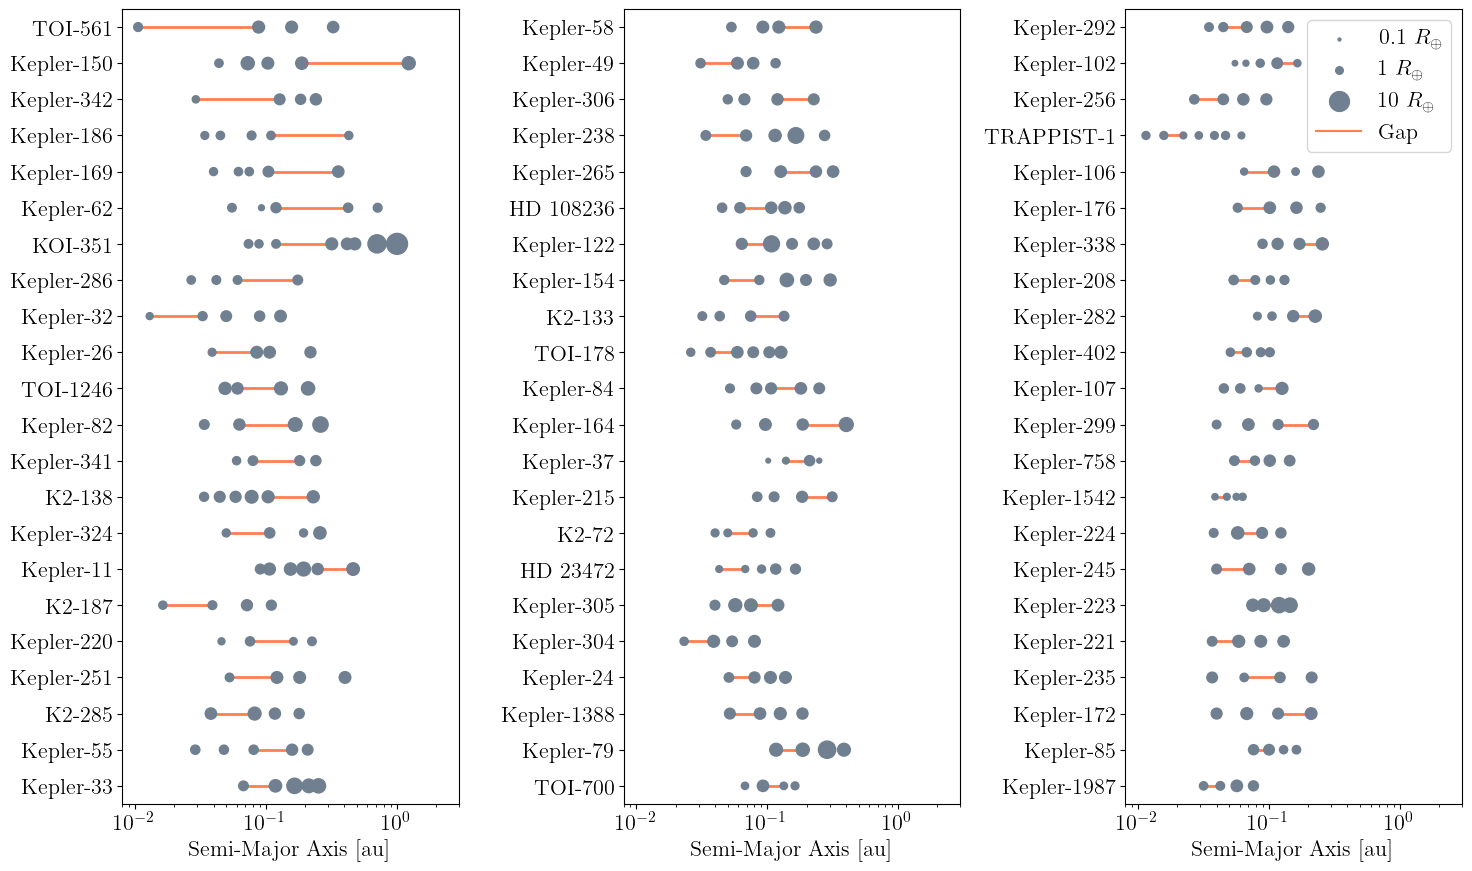

In [7]:
pl_color = "slategray"
gap_color= "coral"

plt.subplots(1, 3, figsize = (15, 9))
plt.subplot(131)
for i in range(len(compact_sys_l)):
    # for j in range(len(dyn_gaps[i])):
        # if dyn_gaps[i][j]>COMPACT_RATIO:
        #     plt.plot((compact_sys[i]["a"][j], compact_sys[i]["a"][j+1]),
        #              [i, i],
        #              "r--")
    
    plt.plot(compact_sys_l[i]["gap"], [i, i],   color=gap_color, linewidth =2)

    plt.scatter(compact_sys_l[i]["a"], 
                i*np.ones(len(compact_sys_l[i]["mass"])),
                s=30*np.array(compact_sys_l[i]["r"])**(1/1.2),
                label=names[i],
                color=pl_color, zorder=4
                )
    # plt.text(1.1, i-.08, names[i])
# plt.xlim(0, 1)
plt.xscale("log")
plt.xlim(0.8e-2, 3)
plt.ylim(-0.5, len(compact_sys_l) - 0.5)
plt.yticks(np.arange(len(compact_sys_l)),names_l)
plt.xlabel("Semi-Major Axis [au]")


plt.subplot(132)
for i in range(len(compact_sys_r)):
    # for j in range(len(dyn_gaps[i])):
        # if dyn_gaps[i][j]>COMPACT_RATIO:
        #     plt.plot((compact_sys[i]["a"][j], compact_sys[i]["a"][j+1]),
        #              [i, i],
        #              "r--")
    
    plt.plot(compact_sys_r[i]["gap"], [i, i],   color=gap_color, linewidth =2)
    plt.scatter(compact_sys_r[i]["a"], 
                i*np.ones(len(compact_sys_r[i]["mass"])),
                s=30*np.array(compact_sys_r[i]["r"])**(1/1.2),
                label=names[i],
                color=pl_color, zorder=4
                )
    
    # plt.text(1.1, i-.08, names[i])
# plt.xlim(0, 1)
plt.xscale("log")
plt.xlim(0.8e-2, 3)
plt.ylim(-0.5, len(compact_sys_r) - 0.5)
plt.yticks(np.arange(len(compact_sys_r)),names_r)
plt.xlabel("Semi-Major Axis [au]")
plt.tight_layout()

plt.subplot(133)
for i in range(len(compact_sys_rr)):
    # for j in range(len(dyn_gaps[i])):
        # if dyn_gaps[i][j]>COMPACT_RATIO:
        #     plt.plot((compact_sys[i]["a"][j], compact_sys[i]["a"][j+1]),
        #              [i, i],
        #              "r--")
    
    plt.plot(compact_sys_rr[i]["gap"], [i, i],  color=gap_color, linewidth =2)
    plt.scatter(compact_sys_rr[i]["a"], 
                i*np.ones(len(compact_sys_rr[i]["mass"])),
                s=30*np.array(compact_sys_rr[i]["r"])**(1/1.2),
                # label=names[i],
                color=pl_color, zorder=4
                )
    
    # plt.text(1.1, i-.08, names[i])
# plt.xlim(0, 1)
plt.xscale("log")
plt.xlim(0.8e-2, 3)
plt.ylim(-0.5, len(compact_sys_rr) - 0.5)
plt.yticks(np.arange(len(compact_sys_rr)),names_rr)
plt.xlabel("Semi-Major Axis [au]")


plt.scatter(1, 1000, s=30*0.1**(1/1.2), label = "$0.1$ $R_\oplus$", color=pl_color)
plt.scatter(1, 1000, s=30*1**(1/1.2), label = "$1$ $R_\oplus$", color=pl_color)
plt.scatter(1, 1000, s=30*10**(1/1.2), label = "$10$ $R_\oplus$", color=pl_color)
plt.plot([-0.5, 0.5], [1000, 1000], color=gap_color, label = "Gap")

plt.legend()
plt.tight_layout()


# plt.savefig("figs/compact_sysv2.png", bbox_inches = "tight", transparent=True)
plt.savefig("figs/system_list.eps")
plt.show()

# plt.legend()

In [32]:
compact_sys[6]

{'name': 'K2-285',
 'st_mass': 0.83,
 'st_upper': 0.02,
 'st_lower': -0.02,
 'st_lim': 0.0,
 'st_ref': '<a refstr=PALLE_ET_AL__2019 href=https://ui.adsabs.harvard.edu/abs/2019A&A...623A..41P/abstract target=ref>Palle et al. 2019</a>',
 'mass': array([ 9.68, 15.68,  6.5 , 10.7 ]),
 'mass_upper': array([1.21, 2.28,  nan,  nan]),
 'mass_lower': array([-1.37, -2.13,   nan,   nan]),
 'mass_lim': array([0., 0., 1., 1.]),
 'r': array([2.59, 3.53, 2.48, 1.95]),
 'r_upper': array([0.06, 0.08, 0.06, 0.05]),
 'r_lower': array([-0.06, -0.08, -0.06, -0.05]),
 'r_lim': array([0., 0., 0., 0.]),
 'e': array([0., 0., 0., 0.]),
 'e_upper': array([nan, nan, nan, nan]),
 'e_lower': array([nan, nan, nan, nan]),
 'e_lim': array([0., 0., 0., 0.]),
 'a': array([0.03817, 0.0824 , 0.1178 , 0.18041]),
 'a_upper': array([0.00095, 0.0018 , 0.0029 , 0.0042 ]),
 'a_lower': array([-0.00092, -0.0018 , -0.0029 , -0.0043 ]),
 'a_lim': array([0., 0., 0., 0.]),
 'inc': array([86.846, 89.861, 89.643, 89.799]),
 'inc_upper'

In [6]:
len(compact_sys)

39

In [99]:
a = np.array([0.053, 0.122, 0.182, 0.404])
ratio = a[1:]/a[:-1]
ratio
ratio/np.min(ratio)

array([1.54302301, 1.        , 1.48798454])

In [6]:
compact_sys

[{'name': 'K2-138',
  'st_mass': 0.94,
  'st_upper': 0.02,
  'st_lower': -0.02,
  'st_lim': 0.0,
  'st_ref': '<a refstr=LOPEZ_ET_AL__2019 href=https://ui.adsabs.harvard.edu/abs/2019A&A...631A..90L/abstract target=ref>Lopez et al. 2019</a>',
  'mass': array([ 3.1 ,  6.31,  7.92, 12.97,  1.63,  4.32]),
  'mass_upper': [1.05, 1.13, 1.39, 1.98, 2.12, 5.26],
  'mass_lower': [-1.05, -1.23, -1.35, -1.99, -1.18, -3.03],
  'mass_lim': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'r': [1.51, 2.299, 2.39, 3.39, 2.904, 3.013],
  'r_upper': [0.11, 0.12, 0.104, 0.156, 0.164, 0.303],
  'r_lower': [-0.084, -0.087, -0.084, -0.11, -0.111, -0.251],
  'r_lim': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'e': array([0.048, 0.045, 0.043, 0.077, 0.062, 0.059]),
  'e_upper': [0.054, 0.051, 0.041, 0.048, 0.064, 0.063],
  'e_lower': [-0.033, -0.032, -0.03, -0.049, -0.043, -0.04],
  'e_lim': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  'a': array([0.03385, 0.04461, 0.05893, 0.0782 , 0.10447, 0.23109]),
  'a_upper': [0.00023, 0.0003, 0.0004, 0.

In [56]:
mass, cdf = np.load("data/st_mass_dist.npy")
mass_func = interp1d(cdf, mass)
MASS_CDF_MIN = np.min(cdf)
MASS_CDF_MAX = np.max(cdf)

In [29]:
refs = {}
with open("tables/bibcodes.json") as f:
    bibcodes = json.load(f)
with open("tables/stellar_parameters.txt", "w+") as f:
    f.write("System & Stellar Mass Prior ($M_\odot$) & Citation\\hline\n")
    for i in range(len(compact_sys)):
        name = compact_sys[i]['name']
        mid = compact_sys[i]['st_mass']
        lo = mid + compact_sys[i]['st_lower']
        hi = mid + compact_sys[i]['st_upper']
        asterisk = ""
        if np.isnan(lo):
            lo = 0.8 * mid
            asterisk = "^*"
        if np.isnan(hi):
            hi = 1.2 * mid
            asterisk = "^*"

        cite = compact_sys[i]['st_ref'].split(">")[1].split("<")[0]
        refs[cite] = compact_sys[i]['st_ref']
        newline = "\\\\"
        bcode = bibcodes[cite]
        if i == len(compact_sys) - 1: newline = ""
        
        if np.isnan(lo) + np.isnan(hi) + (compact_sys[i]['st_mass']<0.1):
            f.write(f"{name} & Emperical$^*$ &")# {cite} {newline}\n")
        else:
            f.write(f"{name} & $U({lo:.3f}, {hi:.3f}){asterisk}$ & ")#{cite} {newline}\n")
        f.write("\citet{")
        f.write(bcode)
        f.write("}")
        f.write(f"{newline}\n")

In [22]:
with open("tables/refs.txt", "w+") as f:
    for key in refs.keys():
        f.write(refs[key].split("=")[2].split("/")[-2])
        f.write('\n')
        
with open("tables/bibcodes_to_fill.json", "w+") as f:
    f.write('{\n"_IGNORE": 0')
    for key in refs.keys():
        f.write(f',\n"{key}": "BIBCODE"')
    f.write("\n}")

In [31]:
with open("tables/planetary_parameters.txt", "w+") as f:
    f.write("Planet Name & Mass Prior ($M_\oplus$) & Semi-Major Axis Prior (au)& Eccentricity Prior & Radius Prior $(R_\oplus)$& Citation\\hline\n")
    for i in range(len(compact_sys)):
        for j in range(len(compact_sys[i]["a"])):
            name = compact_sys[i]['pl_name'][j]
    
            m_mid = compact_sys[i]['mass'][j]
            m_lo = m_mid +  compact_sys[i]['mass_lower'][j]
            m_hi = m_mid +  compact_sys[i]['mass_upper'][j]
            m_prior = f"$U({m_lo:.4g}, {m_hi:.4g})$"
            r_prior = "N/A"
            if np.isnan(m_lo):
                r_mid = compact_sys[i]['r'][j]
                r_lo = r_mid +  compact_sys[i]['r_lower'][j]
                r_hi = r_mid +  compact_sys[i]['r_upper'][j]
                r_prior = f"$U({r_lo:.4g}, {r_hi:.4g})$"
                if np.isnan(r_lo) + np.isnan(r_hi):
                    r_prior = f"$U({0.8 * r_mid:.4g}, {1.2 * r_mid:.4g})$^*$$"


                if np.isnan(m_mid):
                    m_prior = "Mass-Radius$^*$"
                else:
                    m_prior = f"Mass-Radius ($M < {m_mid:.4g}$)$^*$"


                
            a_mid = compact_sys[i]['a'][j]
            a_lo = a_mid +  compact_sys[i]['a_lower'][j]
            a_hi = a_mid +  compact_sys[i]['a_upper'][j]
            a_prior = f"$U({a_lo:.4f}, {a_hi:.4f})$"
            if np.isnan(a_lo) + np.isnan(a_hi):
                a_prior = f"$U({0.8 * a_mid:.4g}, {1.2*a_mid:.4g})^*$"

            e_mid = compact_sys[i]['e'][j]
            e_lo = max(e_mid +  compact_sys[i]['e_lower'][j], 0)
            e_hi = e_mid +  compact_sys[i]['e_upper'][j]
            e_prior = f"$U({e_lo:.4g}, {e_hi:.4g})$"
            if np.isnan(e_lo) + np.isnan(e_hi):
                e_prior = f"0$^*$"



            cite = compact_sys[i]['ref'][j].split(">")[1].split("<")[0]
            refs[cite] = compact_sys[i]['ref'][j]
            bcode = bibcodes[cite]
            cites = "\\citet{" + bcode + "}"
            newline = "\\\\"
            if (i == len(compact_sys) - 1) * (j == len(compact_sys[i]["a"])): 
                newline = ""
            
       
            f.write(f"{name} & {m_prior} & {a_prior} & {e_prior} & {r_prior} & {cites} {newline}\n")

Text(0, 0.5, 'cumulative fraction')

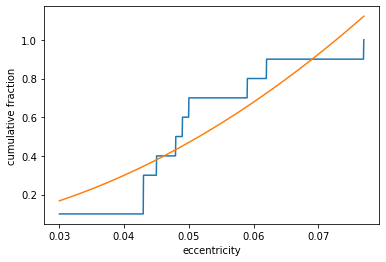

In [18]:
es = []
for i in range(len(cs2)):
    es = np.hstack((es, cs2[i]["e"]))

n, bins = np.histogram(es[~np.isnan(es) * (es<0.5)], bins=1000)
bins = bins[1:]
n = np.cumsum(n)/np.sum(n)

def _pow(x, a, b):
    return a*x**b

[a, b], corr = curve_fit(_pow, bins, n)

plt.plot(bins, n)
x = np.linspace(bins.min(), bins.max(), 1000)
plt.plot(x, _pow(x,a,b))
# plt.fill_between(x, 
#                  _pow(x, a-np.sqrt(corr[0,0]), b+np.sqrt(corr[1,1])),  
#                 _pow(x, a+np.sqrt(corr[0,0]), b-np.sqrt(corr[1,1])),
#                 color="b", alpha = 0.3)


# plt.yscale("log")
# plt.xscale("log")
plt.xlabel("eccentricity")
plt.ylabel("cumulative fraction")


In [19]:
np.save("e_dist_run.npy", np.vstack((bins, n)))

Text(0, 0.5, 'cumulative fraction')

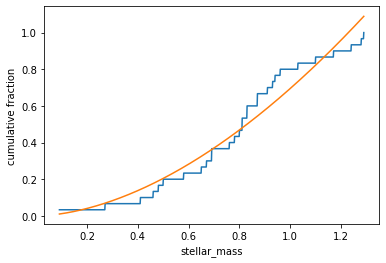

In [52]:
es = []
for i in range(len(compact_sys)):
    es = np.hstack((es, compact_sys[i]["st_mass"]))

n, bins = np.histogram(es[~np.isnan(es) ], bins=1000)
bins = bins[1:]
n = np.cumsum(n)/np.sum(n)

def _pow(x, a, b):
    return a*x**b

[a, b], corr = curve_fit(_pow, bins, n)

plt.plot(bins, n)
x = np.linspace(bins.min(), bins.max(), 1000)
plt.plot(x, _pow(x,a,b))
# plt.fill_between(x, 
#                  _pow(x, a-np.sqrt(corr[0,0]), b+np.sqrt(corr[1,1])),  
#                 _pow(x, a+np.sqrt(corr[0,0]), b-np.sqrt(corr[1,1])),
#                 color="b", alpha = 0.3)


# plt.yscale("log")
# plt.xscale("log")
plt.xlabel("stellar_mass")
plt.ylabel("cumulative fraction")
# np.save("st_mass_dist.npy", np.vstack((bins, n)))

In [50]:
from scipy.interpolate import interp1d

mass, cdf = np.load("data/st_mass_dist.npy")
mass_func = interp1d(cdf, mass)
MASS_CDF_MIN = np.min(cdf)
MASS_CDF_MAX = np.max(cdf)

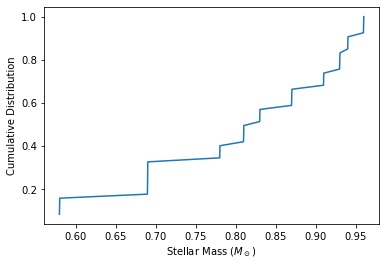

In [62]:
x = np.linspace(MASS_CDF_MIN, MASS_CDF_MAX)
plt.plot(mass_func(x), x)
plt.xlabel(r"Stellar Mass ($M_\odot$)")
plt.ylabel(r"Cumulative Distribution")
plt.savefig("figs/emperical_mass_dist.png")
plt.show()

ValueError: A value in x_new is below the interpolation range.

In [82]:
for key in sys.keys():
    s = sys[key]
    print(s)
    break

{'mass': [nan, nan, nan], 'e': [0.032, 0.098, 0.16], 'a': [2.1, 3.6, 11.6]}


In [47]:
p[1]["pl_name"]

'14 Her b'

In [55]:
len(sys.keys())

309

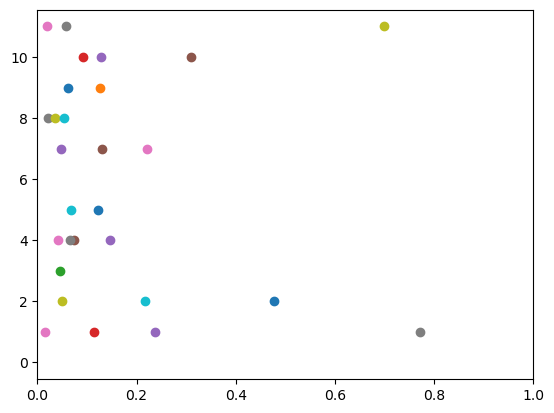

In [74]:

for i in range(len(sys.keys())):
    for p in sys[list(sys.keys())[i]].keys():
        plt.scatter([sys[list(sys.keys())[i]][p]["a"]], [i])
        
    if i > 10: break
    plt.xlim(0, 1)

In [67]:
sys[list(sys.keys())[1]][p]["a"]

0.1134

In [113]:
from scipy.stats import skewnorm, norm


In [130]:
curve_fit?

Signature:
curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    *,
    full_output=False,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``.

Parameters
----------
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, and each element should be float
    convertible if it is an array like object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N). If None, then the
    initia

/home/wcukier/.conda/envs/binary_planets/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


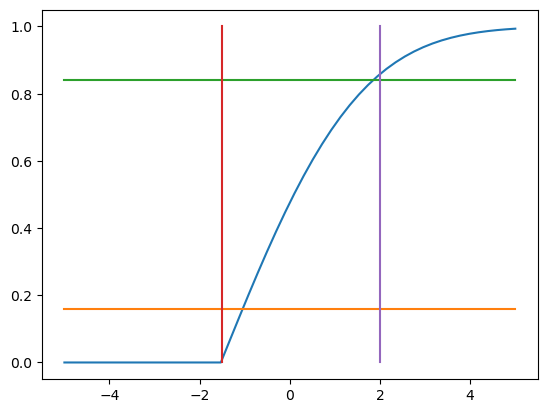

In [170]:
from scipy.special import erf, owens_t
from scipy.optimize import fsolve

upper = 2
lower = -1.5

def equations(p, lo, hi, med):
    a, b, c = p
    return(skewnorm.cdf((lo-a)/b, c) -.16, 
           skewnorm.cdf((med-a)/b, c) -0.5,
           skewnorm.cdf((hi-a)/b, c) -.84)
    
    
a,b,c = fsolve(equations, [1,1,1], args=(-1, 2, 0))

x = np.linspace(-5, 5)
plt.plot(x, skewnorm.cdf((x-a)/b, c))
plt.plot([-5, 5], [.16, .16])
plt.plot([-5,5], [.84, .84])
plt.plot([lower, lower], [0,1])
plt.plot([upper,upper], [0,1])

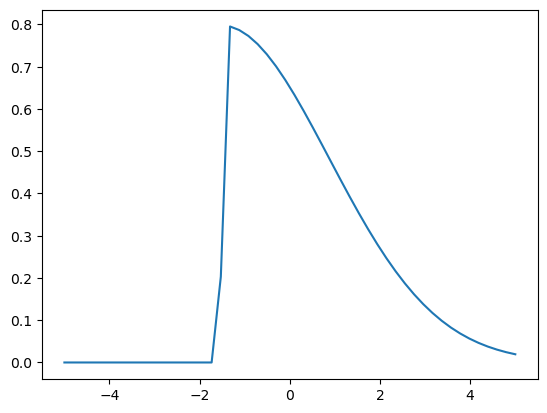

In [168]:
plt.plot(x, skewnorm.pdf((x-a)/b, c))


/home/wcukier/.conda/envs/binary_planets/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


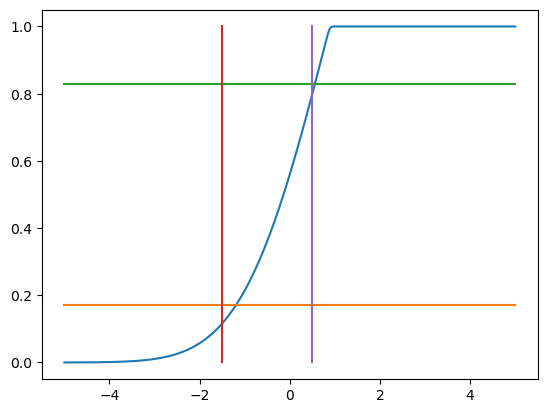

In [8]:
from scipy.stats import skewnorm
upper = .5
lower = -1.5

def f(x, a, b, c):
    # return 1/2*(1 + erf(((x-a)/b)np.sqrt(2))) - 2*owens_t((x-a)/b, c)
    return skewnorm.cdf(x,a,b,c)
    
[a, b, c], _ = curve_fit(f, [lower, 0, upper], [.16, .5, .84])

x = np.linspace(-5, 5, 10000)
plt.plot(x, f(x, a, b, c))
plt.plot([-5, 5], [.17, .17])
plt.plot([-5,5], [.83, .83])
plt.plot([lower, lower], [0,1])
plt.plot([upper,upper], [0,1])

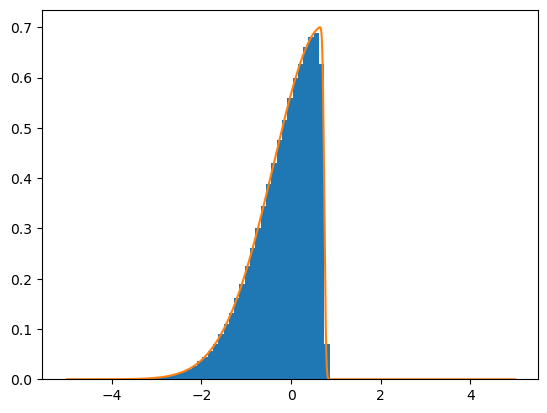

In [245]:
plt.hist((skewnorm.rvs(a,b,c, size=1000000)), density=True, bins=50)
plt.plot(x, skewnorm.pdf(x,a,b,c))

In [10]:
min_mass = np.inf
max_mass = 0
for sys in compact_sys:
    min_mass = min(min_mass, np.min(sys["mass"]))
    max_mass = max(max_mass, np.max(sys["mass"]))

In [11]:
min_mass

0.76

In [12]:
max_mass

36.0

In [251]:
np.load("data/e_dist.npy")

array([[2.90000000e-04, 5.80000000e-04, 8.70000000e-04, ...,
        2.89420000e-01, 2.89710000e-01, 2.90000000e-01],
       [2.28571429e-01, 2.28571429e-01, 2.28571429e-01, ...,
        9.71428571e-01, 9.71428571e-01, 1.00000000e+00]])

In [248]:
from scipy.interpolate import interp1d

In [252]:
from binary_planets.utils import *

In [254]:
%load_ext autoreload
%autoreload 2

In [258]:
compact_sys[0]

{'name': 'K2-138',
 'st_mass': 0.94,
 'st_upper': 0.02,
 'st_lower': -0.02,
 'st_lim': 0.0,
 'st_ref': '<a refstr=LOPEZ_ET_AL__2019 href=https://ui.adsabs.harvard.edu/abs/2019A&A...631A..90L/abstract target=ref>Lopez et al. 2019</a>',
 'mass': array([ 3.1 ,  6.31,  7.92, 12.97,  1.63,  4.32]),
 'mass_upper': [1.05, 1.13, 1.39, 1.98, 2.12, 5.26],
 'mass_lower': [-1.05, -1.23, -1.35, -1.99, -1.18, -3.03],
 'mass_lim': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'r': [1.51, 2.299, 2.39, 3.39, 2.904, 3.013],
 'r_upper': [0.11, 0.12, 0.104, 0.156, 0.164, 0.303],
 'r_lower': [-0.084, -0.087, -0.084, -0.11, -0.111, -0.251],
 'r_lim': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'e': array([0.048, 0.045, 0.043, 0.077, 0.062, 0.059]),
 'e_upper': [0.054, 0.051, 0.041, 0.048, 0.064, 0.063],
 'e_lower': [-0.033, -0.032, -0.03, -0.049, -0.043, -0.04],
 'e_lim': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'a': array([0.03385, 0.04461, 0.05893, 0.0782 , 0.10447, 0.23109]),
 'a_upper': [0.00023, 0.0003, 0.0004, 0.00053, 0.0007, 0.001

In [264]:

get_eccen(compact_sys[0])

in_else_block
30.565279599318565 0.00029320429713491913 0.0716172066842856
in_else_block
32.91609602851774 -0.0009811473557880498 0.06862799596181426
in_else_block
3.2145539229751687 0.005316604709494055 0.05599957165310323
in_else_block
-0.7126666974100822 0.1020179125893225 0.05511126434559874
in_else_block
5.071686961982787 0.0029163106353952695 0.08759958769465254
in_else_block
32.11776562028746 0.0016763286113217748 0.08533551048479039


[0.048 0.045 0.043 0.077 0.062 0.059]
[0.03304017 0.0741467  0.00602863 0.05781556 0.02717955 0.00821142]


array([0.03304017, 0.0741467 , 0.00602863, 0.05781556, 0.02717955,
       0.00821142])

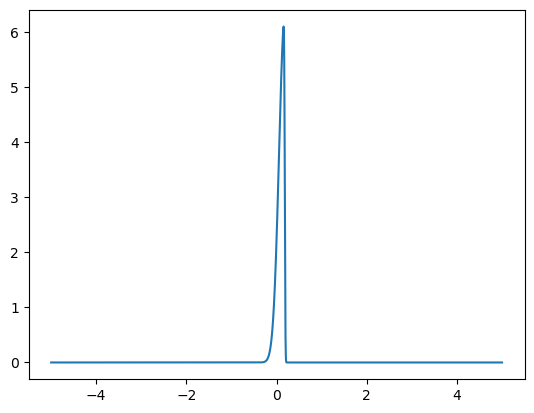

In [262]:
plt.plot(x, skewnorm.pdf(x, -11.645921860932454, 0.18196764786507202, 0.12709571795374391))

In [14]:
compact_sys[0]["gap"]

[0.10447, 0.23109]